#PROPHET MODEL


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

Here We have applied Prophet model with monthly seasonality on Karimnagar District univariate AQI data provided by NASSCOM.

In [1]:
## All necessary installations for the model to work
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536760 sha256=b10bea6bf3de9345064b922af9088c0f33a8411826cb868288631eb578882255
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstan

In [2]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet

In [3]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Karimnagar'] = pd.to_numeric(df['Karimnagar'],errors='coerce')

# EDA

In [4]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad             object
Adilabad              object
Kuda, warangal         int64
Mee-Seva, Warangal     int64
Khammam               object
Karimnagar             int64
dtype: object
Nizamabad             0
Adilabad              0
Kuda, warangal        0
Mee-Seva, Warangal    0
Khammam               0
Karimnagar            0
dtype: int64


<AxesSubplot:xlabel='Month'>

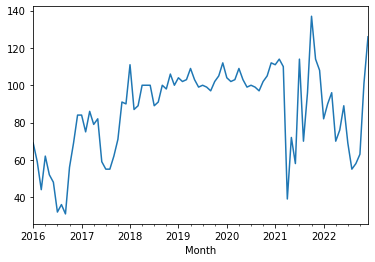

In [5]:
df["Karimnagar"].plot()

In [6]:
df['Karimnagar'] = df['Karimnagar'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

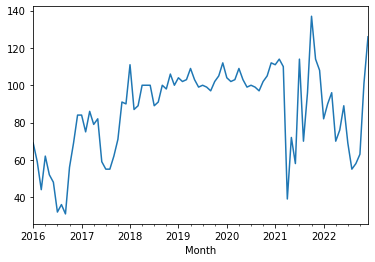

In [7]:
df["Karimnagar"].plot()

# MODEL

In [11]:
dfKN = df[["Karimnagar"]]
dfKN=dfKN.reset_index()
dfKN.rename(columns={'Month': 'ds', 'Karimnagar': 'y'}, inplace=True)

In [12]:
# Applying Prophet model 
model = Prophet(seasonality_mode="multiplicative")
model.fit(dfKN)
model.component_modes
future_dates=model.make_future_dataframe(periods=12,freq='M')
prediction = model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


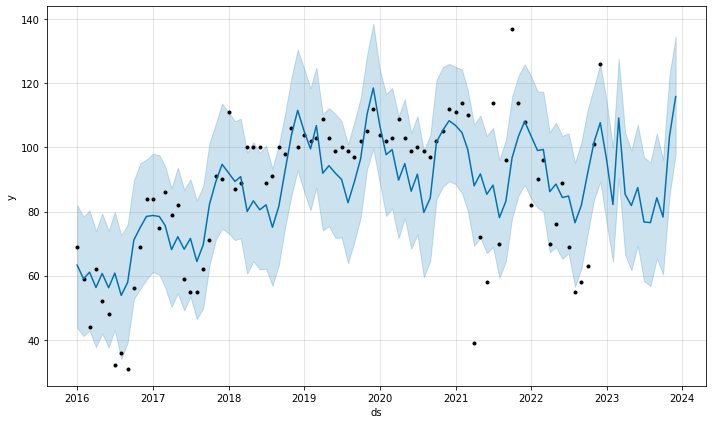

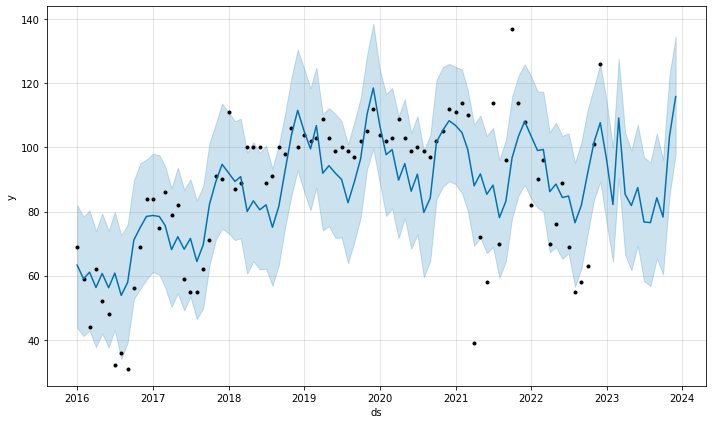

In [13]:
model.plot(prediction)

In [14]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
84,2022-12-31,89.199345,76.715138,114.705442,89.193755,89.203338,0.080172,0.080172,0.080172,0.080172,0.080172,0.080172,0.0,0.0,0.0,96.350601
85,2023-01-31,89.003640,64.249945,99.996154,88.957270,89.038190,-0.076553,-0.076553,-0.076553,-0.076553,-0.076553,-0.076553,0.0,0.0,0.0,82.190119
86,2023-02-28,88.826874,90.573070,127.671137,88.722743,88.911613,0.229083,0.229083,0.229083,0.229083,0.229083,0.229083,0.0,0.0,0.0,109.175597
87,2023-03-31,88.631169,66.473970,104.632032,88.459478,88.778923,-0.036846,-0.036846,-0.036846,-0.036846,-0.036846,-0.036846,0.0,0.0,0.0,85.365442
88,2023-04-30,88.441777,61.689281,99.009970,88.176108,88.663860,-0.074479,-0.074479,-0.074479,-0.074479,-0.074479,-0.074479,0.0,0.0,0.0,81.854692
89,2023-05-31,88.246073,69.312858,107.098415,87.880745,88.556498,-0.008520,-0.008520,-0.008520,-0.008520,-0.008520,-0.008520,0.0,0.0,0.0,87.494247
90,2023-06-30,88.056681,58.304985,96.987335,87.606579,88.451780,-0.128612,-0.128612,-0.128612,-0.128612,-0.128612,-0.128612,0.0,0.0,0.0,76.731557
91,2023-07-31,87.860976,56.744990,95.247374,87.304251,88.367515,-0.128840,-0.128840,-0.128840,-0.128840,-0.128840,-0.128840,0.0,0.0,0.0,76.540947
92,2023-08-31,87.665271,65.331960,104.316939,86.990906,88.286669,-0.038492,-0.038492,-0.038492,-0.038492,-0.038492,-0.038492,0.0,0.0,0.0,84.290866
93,2023-09-30,87.475879,60.348201,96.204969,86.675139,88.221712,-0.105103,-0.105103,-0.105103,-0.105103,-0.105103,-0.105103,0.0,0.0,0.0,78.281917


In [23]:
from pandas.tseries.offsets import DateOffset
pred_date=[df.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=df.columns)
data = pd.concat([df,pred_date])

In [24]:
data

,Nizamabad,Adilabad,"Kuda, warangal","Mee-Seva, Warangal",Khammam,Karimnagar
2016-01-01,62,67,73,76,47,69
2016-02-01,64,68,72,72,51,59
2016-03-01,66,71,68,63,54,44
2016-04-01,68,70,74,73,51,62
2016-05-01,69,71,76,84,47,52
...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

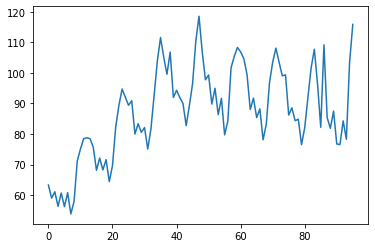

In [31]:
prediction["yhat"].plot()

<ipython-input-32-83d18a14566c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Karimnagar"][-12:]=prediction["yhat"][-12:]


<AxesSubplot:>

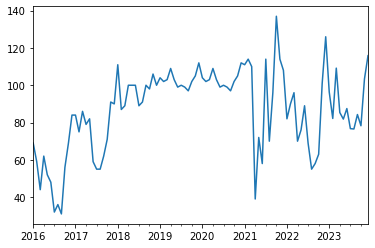

In [32]:
data["Karimnagar"][-12:]=prediction["yhat"][-12:]
data["Karimnagar"].plot()

# ERROR CALCULATION

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84])),2)
mae = round(mean_absolute_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84]),2)
mape = round(mean_absolute_percentage_error(dfKN["y"].iloc[-12:], prediction["yhat"].iloc[72:84]),2)
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 16.99
MAE  : 14.72
MAPE : 21.0%


The mean absolute percentage error is : 20.77%
So we discard this model for Karimnagar Data and move onto applying SARIMAX, Seasonal ETS and XGBoost with XAI.

In [37]:
data[["Karimnagar"]]

,Karimnagar
2016-01-01,69
2016-02-01,59
2016-03-01,44
2016-04-01,62
2016-05-01,52
...,...
2023-08-01,76.540947
2023-09-01,84.290866
2023-10-01,78.281917
2023-11-01,103.420249
